## 6610450951 Tontawan Janthai KNN

## Import libs

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Read data

In [2]:
df = pd.read_excel("Psycology.xls")
df.head()

,เพศ,อายุ,เคยมีแฟนมาแล้ว (คน),จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์,ระยะเวลาการนอน,นิสิยการกินอาหาร,เคยคิดฆ่าตัวตาย,จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์,ระดับความเครียดด้านการเงิน,เคยกินยานอนหลับ,ภาวะซึมเศร้า
0,Male,28,5,3,5-6 ชั่วโมง,อาหารสุขภาพ,Yes,8,3,Yes,Yes
1,Male,23,5,2,มากกว่า 8 ชั่วโมง,อาหารทั่วไป,No,10,4,No,Yes
2,Female,23,1,3,น้อยกว่า 5 ชั่วโมง,อาหารสุขภาพ,Yes,0,3,No,No
3,Female,20,5,5,มากกว่า 8 ชั่วโมง,Junkfood,Yes,2,5,No,Yes
4,Male,29,4,3,มากกว่า 8 ชั่วโมง,Junkfood,Yes,1,3,No,Yes


In [3]:
df.columns

Index(['เพศ', 'อายุ', 'เคยมีแฟนมาแล้ว  (คน)',
       'จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์', 'ระยะเวลาการนอน',
       'นิสิยการกินอาหาร', 'เคยคิดฆ่าตัวตาย',
       'จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์',
       'ระดับความเครียดด้านการเงิน', 'เคยกินยานอนหลับ', 'ภาวะซึมเศร้า'],
      dtype='object')

### See if there is any suspicious values

In [4]:
genders = df['เพศ'].unique()
ages = df['อายุ'].unique()
girlfriend_amount = df['เคยมีแฟนมาแล้ว  (คน)'].unique()
exercise = df['จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์'].unique()
sleep_time = df['ระยะเวลาการนอน'].unique()
food_habit = df['นิสิยการกินอาหาร'].unique()
sucide = df['เคยคิดฆ่าตัวตาย'].unique()
library_time = df['จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์'].unique()
money_status = df['ระดับความเครียดด้านการเงิน'].unique()
sleeping_pill = df['เคยกินยานอนหลับ'].unique()
is_sadness = df['ภาวะซึมเศร้า'].unique()

print('เพศ ', genders)
print('อายุ ', ages)
print('เคยมีแฟนมาแล้ว  (คน) ', girlfriend_amount)
print('จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์ ', exercise)
print('ระยะเวลาการนอน', sleep_time)
print('นิสิยการกินอาหาร ', food_habit)
print('เคยคิดฆ่าตัวตาย ', sucide)
print('จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์ ', library_time)
print('ระดับความเครียดด้านการเงิน ', money_status)
print('เคยกินยานอนหลับ ', sleeping_pill)
print('ภาวะซึมเศร้า', is_sadness)

เพศ  ['Male' 'Female']
อายุ  [28 23 20 29 31 24 33 25 19 34 21 30 32 26 22 27 18]
เคยมีแฟนมาแล้ว  (คน)  [5 1 4 2 3 '?']
จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์  [3 2 5 4 '?' 1]
ระยะเวลาการนอน ['5-6 ชั่วโมง' 'มากกว่า 8 ชั่วโมง' 'น้อยกว่า 5 ชั่วโมง' '7-8 ชั่วโมง']
นิสิยการกินอาหาร  ['อาหารสุขภาพ' 'อาหารทั่วไป' 'Junkfood']
เคยคิดฆ่าตัวตาย  ['Yes' 'No']
จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์  [8 10 0 2 1 3 11 12 9 7 4 6 '?' 5]
ระดับความเครียดด้านการเงิน  [3 4 5 '?' 1 2]
เคยกินยานอนหลับ  ['Yes' 'No']
ภาวะซึมเศร้า ['Yes' 'No']


### Ignore all rows that has '?' in it

In [5]:
#Before
print(f"Data size before cut is {df.shape[0]}")

#cut
df = df[~df.isin(['?']).any(axis=1)]

#After
print(f"Data size after cut is {df.shape[0]}")


Data size before cut is 502
Data size after cut is 467


### Data Mapping

In [6]:
df['เพศ'] = df['เพศ'].replace({'Male': 1, 'Female': 0})

#'อายุ' is no need for mapping
#'เคยมีแฟนมาแล้ว  (คน)' is no need for mapping
#'จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์' is no need for mapping

df['ระยะเวลาการนอน'] = df['ระยะเวลาการนอน'].replace({
    '5-6 ชั่วโมง': 5.5,
    'มากกว่า 8 ชั่วโมง': 8.5,
    'น้อยกว่า 5 ชั่วโมง': 4.5,
    '7-8 ชั่วโมง': 7.5
})

df['นิสิยการกินอาหาร'] = df['นิสิยการกินอาหาร'].replace({
    'อาหารสุขภาพ': 0, 
    'อาหารทั่วไป': 1, 
    'Junkfood': 2
})

df['เคยคิดฆ่าตัวตาย'] = df['เคยคิดฆ่าตัวตาย'].replace({'Yes': 1, 'No': 0})

#'จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์' is no need for mapping
#'ระดับความเครียดด้านการเงิน' is no need for mapping

df['เคยกินยานอนหลับ'] = df['เคยกินยานอนหลับ'].replace({'Yes': 1, 'No': 0})
df['ภาวะซึมเศร้า'] = df['ภาวะซึมเศร้า'].replace({'Yes': 1, 'No': 0})

df.head()

C:\Users\spire\AppData\Local\Temp\ipykernel_81572\2237283390.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['เพศ'] = df['เพศ'].replace({'Male': 1, 'Female': 0})
C:\Users\spire\AppData\Local\Temp\ipykernel_81572\2237283390.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ระยะเวลาการนอน'] = df['ระยะเวลาการนอน'].replace({
C:\Users\spire\AppData\Local\Temp\ipykernel_81572\2237283390.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, 

,เพศ,อายุ,เคยมีแฟนมาแล้ว (คน),จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์,ระยะเวลาการนอน,นิสิยการกินอาหาร,เคยคิดฆ่าตัวตาย,จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์,ระดับความเครียดด้านการเงิน,เคยกินยานอนหลับ,ภาวะซึมเศร้า
0,1,28,5,3,5.5,0,1,8,3,1,1
1,1,23,5,2,8.5,1,0,10,4,0,1
2,0,23,1,3,4.5,0,1,0,3,0,0
3,0,20,5,5,8.5,2,1,2,5,0,1
4,1,29,4,3,8.5,2,1,1,3,0,1


## Prepare Training Data

In [9]:
X = df.drop('ภาวะซึมเศร้า', axis=1).values

scaler = StandardScaler()
X = scaler.fit_transform(X.astype(float))
y = df['ภาวะซึมเศร้า'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

## KNN 5 folds

In [11]:
k_values = range(1, 100)
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean()) #Avg of cross-validation (5 folds)

## Optimal K Values

In [14]:
optimal_k_values = [k_values[i] for i in range(len(cv_scores)) if cv_scores[i] == max(cv_scores)]
print(optimal_k_values)

[60]


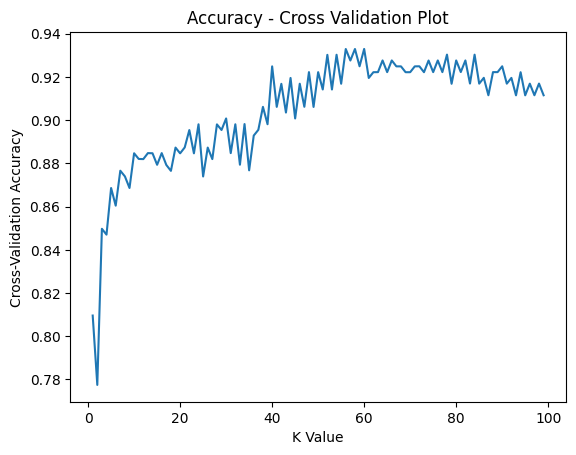

In [17]:
plt.plot(k_values, cv_scores)
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Accuracy - Cross Validation Plot')
plt.show()

## Testing The Prediction

In [18]:
knn = KNeighborsClassifier(n_neighbors= optimal_k_values[0]).fit(X_train, y_train)

y_pred = knn.predict(X)
df['ภาวะซึมเศร้า_predict'] = pd.DataFrame(y_pred)
df[['ภาวะซึมเศร้า','ภาวะซึมเศร้า_predict']].head(15)

,ภาวะซึมเศร้า,ภาวะซึมเศร้า_predict
0,1,1.0
1,1,1.0
2,0,0.0
3,1,1.0
4,1,1.0
6,0,0.0
7,0,1.0
9,1,1.0
11,0,0.0
12,1,1.0


## Heat Map

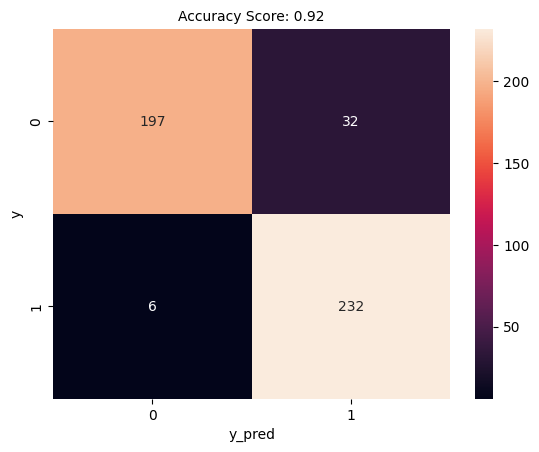

In [20]:
acc = round(accuracy_score(y, y_pred), 2)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y')
plt.title(f"Accuracy Score: {acc}", size=10)
plt.show()

## Classification Report

In [21]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       229
           1       0.88      0.97      0.92       238

    accuracy                           0.92       467
   macro avg       0.92      0.92      0.92       467
weighted avg       0.92      0.92      0.92       467

